In [154]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("./data/north.csv")

In [156]:
df['DMA'].unique()

array([  71,   84,   87,   88,   95,  136,  200,  229,  246,  253,  333,
        340,  368,  393,  415,  479,  508,  522,  546,  550,  583,  597,
        618,  621,  626,  649,  652,  662,  671,  683,  691,  716,  721,
        731,  733,  741,  754,  797,  871,  903,  931,  963, 1010, 1031,
       1079, 1093, 1160, 1168, 1179, 1196, 1207, 1212, 1246, 1275, 1301,
       1309, 1336, 1452, 1459, 1470, 1513, 1544, 1548, 1621, 1627, 1658,
       1680, 1711, 1759, 1858, 1865, 1882, 1946, 1968, 2073, 2098, 2114,
       2120, 2149, 2152, 2313, 2318, 2339, 2354, 2360, 2364, 2367, 2381,
       2401, 2414, 2425, 2426,   30,   41,  103,  104,  111,  129,  134,
        152,  178,  187,  204,  209,  210,  258,  279,  334,  361,  377,
        405,  408,  414,  424,  437,  496,  498,  507,  523,  530,  576,
        613,  636,  668,  670,  745,  746,  768,  780,  808,  815,  825,
        828,  838,  863,  868,  908,  917,  937,  941,  947,  948,  966,
        996, 1036, 1037, 1045, 1049, 1116, 1128, 11

In [157]:
dma = df = df[(df['DMA'] == 838)]
dma = dma.drop(['Unnamed: 0','Area', 'DMA', 'Flow Validity Code','Number Of Household Properties', 'Number Of Non-Household Properties'], axis=1)
dma.isnull().sum()

Datetime    0
Date        0
Time        0
Flow        8
dtype: int64

In [158]:
len(dma.index)

35040

In [160]:
dma['Datetime'] = pd.to_datetime(dma['Datetime'])
dma['hour'] = dma['Datetime'].dt.hour
dma['day_of_week'] = dma['Datetime'].dt.dayofweek
dma = dma.set_index('Datetime')

In [161]:
dma['intervalMean'] = dma.groupby([dma.day_of_week, dma.Time])['Flow'].transform(np.mean)

In [162]:
#dma.to_pickle("./data/DMAProcessed")
empt = dma[dma.isnull().any(axis=1)]
empt.head()

,Date,Time,Flow,hour,day_of_week,intervalMean
Datetime,,,,,,
2016-09-04 09:15:00,09/04/2016,09:15:00,NaN,9,6,6.75672
2016-09-04 09:30:00,09/04/2016,09:30:00,NaN,9,6,6.76332
2016-12-25 02:15:00,25/12/2016,02:15:00,NaN,2,6,1.75970
2016-12-25 02:30:00,25/12/2016,02:30:00,NaN,2,6,1.77092
2017-03-26 01:00:00,26/03/2017,01:00:00,NaN,1,6,2.07252


In [163]:
dma.Flow.fillna(dma.intervalMean, inplace=True)
empt = dma[dma.isnull().any(axis=1)]
empt.head()

,Date,Time,Flow,hour,day_of_week,intervalMean
Datetime,,,,,,


In [164]:
totalPlot = dma[['Flow', 'intervalMean', 'day_of_week']]

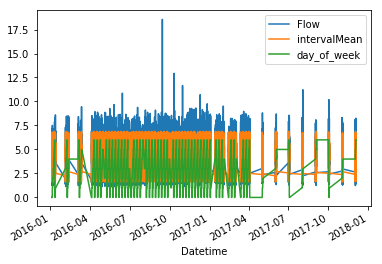

In [165]:
totalPlot.plot()
#09/08/2016
#30/08/2016
#20/12/2016
#03/01/2017

In [166]:
day1 = totalPlot[:96]
day2 = totalPlot[96:192]
day3 = totalPlot[192:288]

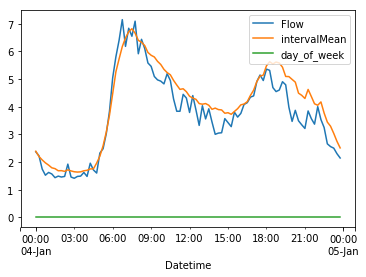

In [167]:
day1.plot()

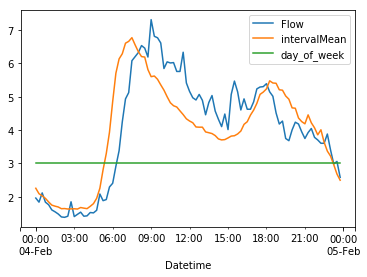

In [168]:
day2.plot()

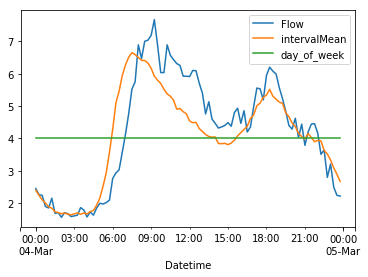

In [169]:
day3.plot()

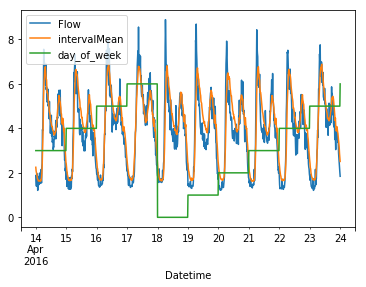

In [170]:
normal10Days = totalPlot['2016-04-14 00:00:00':'2016-04-24 00:00:00']
normal10Days.plot()

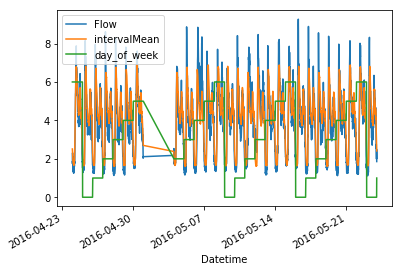

In [171]:
normalMonth = totalPlot['2016-04-24 00:00:00':'2016-05-24 00:00:00']
normalMonth.plot()

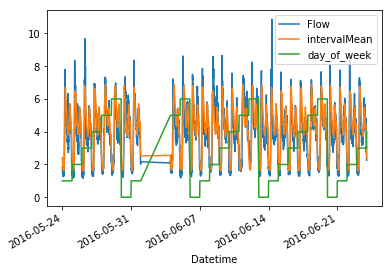

In [172]:
normalMonth = totalPlot['2016-05-24 00:00:00':'2016-06-24 00:00:00']
normalMonth.plot()

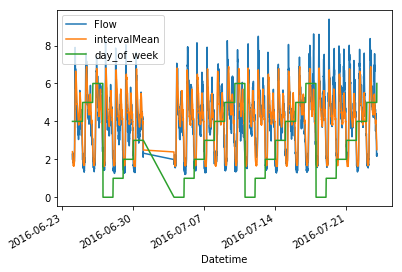

In [173]:
normalMonth = totalPlot['2016-06-24 00:00:00':'2016-07-24 00:00:00']
normalMonth.plot()

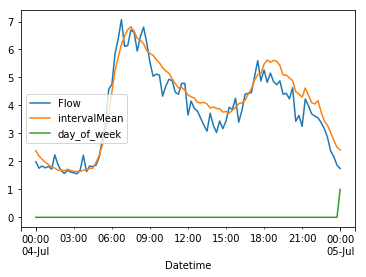

In [174]:
normalMonth = totalPlot['2016-07-01 00:00:00':'2016-07-05 00:00:00']
normalMonth.plot()

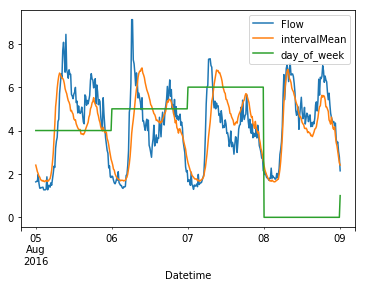

In [175]:
# Repairs
#96 steps per day
#09/08/2016
#30/08/2016
#20/12/2016
#03/01/2017

firstRepair = totalPlot['2016-08-05 00:00:00' : '2016-08-09 00:00:00']
firstRepair.plot()

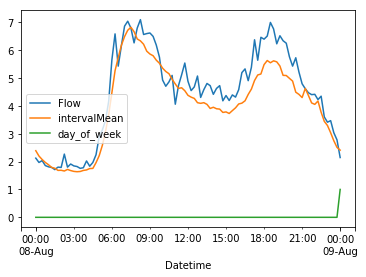

In [176]:
DayBeforefirstRepair = totalPlot['2016-08-08 00:00:00' : '2016-08-09 00:00:00']
DayBeforefirstRepair.plot()

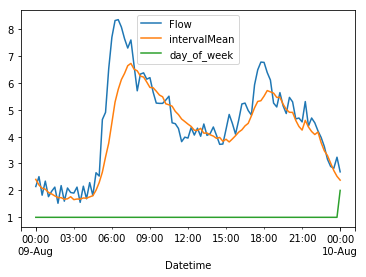

In [177]:
DayAfterfirstRepair = totalPlot['2016-08-09 00:00:00' : '2016-08-10 00:00:00']
DayAfterfirstRepair.plot()

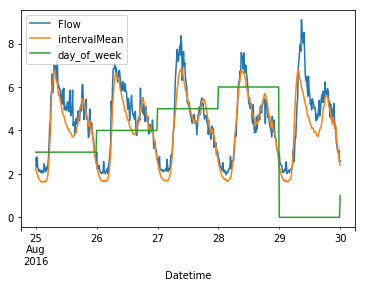

In [178]:
secondRepair = totalPlot['2016-08-25 00:00:00' : '2016-08-30 00:00:00']
secondRepair.plot()

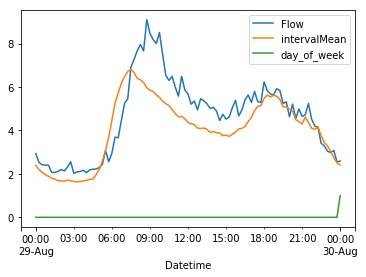

In [179]:
dayBeforeSecondRepair = totalPlot['2016-08-29 00:00:00' : '2016-08-30 00:00:00']
dayBeforeSecondRepair.plot()

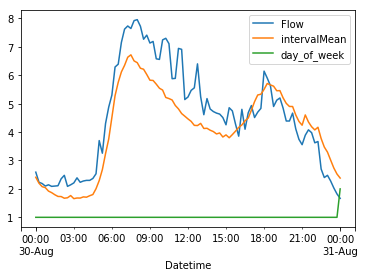

In [180]:
dayAfterSecondRepair = totalPlot['2016-08-30 00:00:00' : '2016-08-31 00:00:00']
dayAfterSecondRepair.plot()

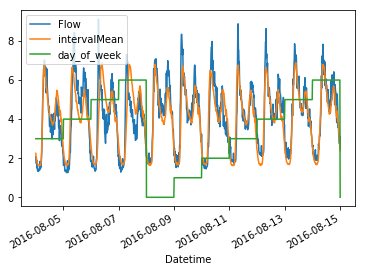

In [181]:
august1 = totalPlot['2016-08-01 00:00:00' : '2016-08-15 00:00:00']
august1.plot()

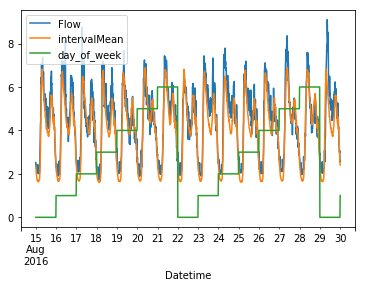

In [182]:
august2 = totalPlot['2016-08-15 00:00:00' : '2016-08-30 00:00:00']
august2.plot()

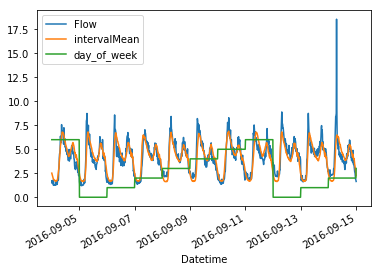

In [183]:
sept1 = totalPlot['2016-09-01 00:00:00' : '2016-09-15 00:00:00']
sept1.plot()

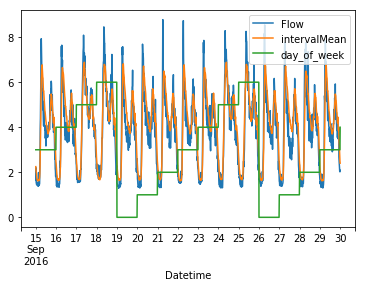

In [184]:
sept2 = totalPlot['2016-09-15 00:00:00' : '2016-09-30 00:00:00']
sept2.plot()

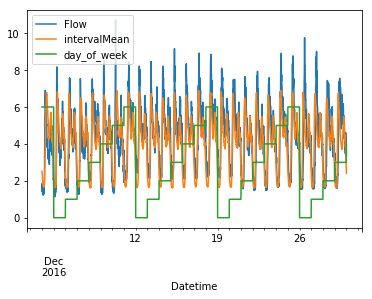

In [185]:
Dec1 = totalPlot['2016-12-01 00:00:00' : '2016-12-30 00:00:00']
Dec1.plot()

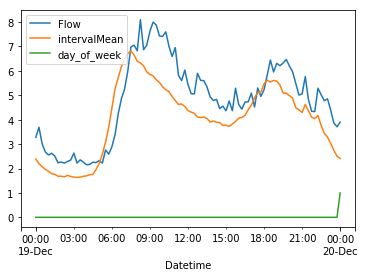

In [186]:
DaybeforeDecRepair = totalPlot['2016-12-19 00:00:00' : '2016-12-20 00:00:00']
DaybeforeDecRepair.plot()

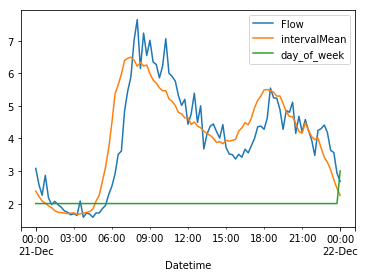

In [187]:
DayAfterDecRepair = totalPlot['2016-12-21 00:00:00' : '2016-12-22 00:00:00']
DayAfterDecRepair.plot()

In [188]:
dma.to_pickle("./readyToGo")

In [189]:
dma.head()

,Date,Time,Flow,hour,day_of_week,intervalMean
Datetime,,,,,,
2016-01-04 00:00:00,01/04/2016,00:00:00,2.367,0,0,2.388444
2016-01-04 00:15:00,01/04/2016,00:15:00,2.222,0,0,2.197796
2016-01-04 00:30:00,01/04/2016,00:30:00,1.744,0,0,2.073685
2016-01-04 00:45:00,01/04/2016,00:45:00,1.522,0,0,1.968556
2016-01-04 01:00:00,01/04/2016,01:00:00,1.622,1,0,1.886222
